Assignment:

Numerical data more, few string (one word or two words) → Check for structured or unstructured → Find delimiter → Input → Manual Check → Cleaning (duplicates, missing and standardization vs normalization) → Label Encoding or One Hot Encoding (Ordinal or Nominal)  → Fill or remove data →  Details using .describe → Outlier Detection → Box plot and Scatterplot → Use pandas columns

Dataset Link: https://data.world/ia-nam/international-rescue-committee-irc-activities

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#importing the csv file
df = pd.read_csv('rescue-data.csv')

In [64]:
#information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   iati-identifier               780 non-null    object 
 1   hierarchy                     0 non-null      float64
 2   titles                        780 non-null    object 
 3   default-currency              0 non-null      float64
 4   commitment                    0 non-null      float64
 5   disbursement                  0 non-null      float64
 6   reimbursement                 0 non-null      float64
 7   expenditure                   0 non-null      float64
 8   incoming-funds                0 non-null      float64
 9   loan-repayment                0 non-null      float64
 10  interest-repayment            0 non-null      float64
 11  transaction-value             780 non-null    float64
 12  transaction-value_currency    780 non-null    object 
 13  trans

**It can be seen that the loaded dataset has a structured form**

In [61]:
#print head of the file
print(df.head())

print("------------------------------------")
#print first 10 records
print(df.head(10))

                      iati-identifier  hierarchy  \
0  US-EIN-13-3287064NAM-IRC-HT-10-479        NaN   
1  US-EIN-13-3287064NAM-IRC-HT-10-480        NaN   
2  US-EIN-13-3287064NAM-IRC-HT-10-481        NaN   
3  US-EIN-13-3287064NAM-IRC-HT-10-482        NaN   
4  US-EIN-13-3287064NAM-IRC-HT-11-483        NaN   

                                              titles  default-currency  \
0  Integrated Emergency Protection Response to Ha...               NaN   
1                           Post Earthquake Response               NaN   
2  Post Earthquake Gender-Based Violence and Chil...               NaN   
3  Restoring a Protective Environment in the Comm...               NaN   
4                              Cholera Response (II)               NaN   

   commitment  disbursement  reimbursement  expenditure  incoming-funds  \
0         NaN           NaN            NaN          NaN             NaN   
1         NaN           NaN            NaN          NaN             NaN   
2         NaN    

In [62]:
#print the tail of the dataset
print(df.tail())


print("---------------------------")

#printing last 8 records of the dataset

print(df.tail(8))

                          iati-identifier  hierarchy  \
775  US-EIN-13-3287064NAM-IRC-JO-16-20247        NaN   
776  US-EIN-13-3287064NAM-IRC-UG-16-20248        NaN   
777  US-EIN-13-3287064NAM-IRC-KE-16-20249        NaN   
778  US-EIN-13-3287064NAM-IRC-IQ-16-20250        NaN   
779  US-EIN-13-3287064NAM-IRC-SL-16-20251        NaN   

                                                titles  default-currency  \
775  Scaling up Health, Economic Well-Being and Pro...               NaN   
776                             Urban Refugees Program               NaN   
777  Solar Power System Installation for New Hospit...               NaN   
778                                 Education in Dihok               NaN   
779  Ensuring community based health care for mothe...               NaN   

     commitment  disbursement  reimbursement  expenditure  incoming-funds  \
775         NaN           NaN            NaN          NaN             NaN   
776         NaN           NaN            NaN        

In [63]:
#all the columns of the dataset

print(df.columns)

Index(['iati-identifier', 'hierarchy', 'titles', 'default-currency',
       'commitment', 'disbursement', 'reimbursement', 'expenditure',
       'incoming-funds', 'loan-repayment', 'interest-repayment',
       'transaction-value', 'transaction-value_currency', 'transaction-type',
       'transaction-date', 'transaction-date_iso-date',
       'transaction-value_value-date', 'provider-org-ref', 'provider-org',
       'provider-activity-id', 'receiver-org-ref', 'receiver-org',
       'receiver-activity-id', 'description_lang', 'description',
       'flow-type_code', 'flow-type_lang', 'flow-type', 'aid-type_code',
       'aid-type_lang', 'aid-type', 'finance-type_code', 'finance-type_lang',
       'finance-type', 'tied-status_code', 'tied-status_lang', 'tied-status',
       'disbursement-channel_code', 'disbursement-channel'],
      dtype='object')


In [65]:
#delimiter

pd_dataframe = pd.read_csv("rescue-data.csv", sep=",")

print(pd_dataframe)

                          iati-identifier  hierarchy  \
0      US-EIN-13-3287064NAM-IRC-HT-10-479        NaN   
1      US-EIN-13-3287064NAM-IRC-HT-10-480        NaN   
2      US-EIN-13-3287064NAM-IRC-HT-10-481        NaN   
3      US-EIN-13-3287064NAM-IRC-HT-10-482        NaN   
4      US-EIN-13-3287064NAM-IRC-HT-11-483        NaN   
..                                    ...        ...   
775  US-EIN-13-3287064NAM-IRC-JO-16-20247        NaN   
776  US-EIN-13-3287064NAM-IRC-UG-16-20248        NaN   
777  US-EIN-13-3287064NAM-IRC-KE-16-20249        NaN   
778  US-EIN-13-3287064NAM-IRC-IQ-16-20250        NaN   
779  US-EIN-13-3287064NAM-IRC-SL-16-20251        NaN   

                                                titles  default-currency  \
0    Integrated Emergency Protection Response to Ha...               NaN   
1                             Post Earthquake Response               NaN   
2    Post Earthquake Gender-Based Violence and Chil...               NaN   
3    Restoring a Protec

**Cleaning Process**

In [66]:
#checking for duplicates
df_duplicates = df[df.duplicated()]


print(df_duplicates)

Empty DataFrame
Columns: [iati-identifier, hierarchy, titles, default-currency, commitment, disbursement, reimbursement, expenditure, incoming-funds, loan-repayment, interest-repayment, transaction-value, transaction-value_currency, transaction-type, transaction-date, transaction-date_iso-date, transaction-value_value-date, provider-org-ref, provider-org, provider-activity-id, receiver-org-ref, receiver-org, receiver-activity-id, description_lang, description, flow-type_code, flow-type_lang, flow-type, aid-type_code, aid-type_lang, aid-type, finance-type_code, finance-type_lang, finance-type, tied-status_code, tied-status_lang, tied-status, disbursement-channel_code, disbursement-channel]
Index: []

[0 rows x 39 columns]


In [67]:
#handling missing values
df_cleaned = df.drop_duplicates().fillna(method='ffill')

print(df_cleaned)

                          iati-identifier  hierarchy  \
0      US-EIN-13-3287064NAM-IRC-HT-10-479        NaN   
1      US-EIN-13-3287064NAM-IRC-HT-10-480        NaN   
2      US-EIN-13-3287064NAM-IRC-HT-10-481        NaN   
3      US-EIN-13-3287064NAM-IRC-HT-10-482        NaN   
4      US-EIN-13-3287064NAM-IRC-HT-11-483        NaN   
..                                    ...        ...   
775  US-EIN-13-3287064NAM-IRC-JO-16-20247        NaN   
776  US-EIN-13-3287064NAM-IRC-UG-16-20248        NaN   
777  US-EIN-13-3287064NAM-IRC-KE-16-20249        NaN   
778  US-EIN-13-3287064NAM-IRC-IQ-16-20250        NaN   
779  US-EIN-13-3287064NAM-IRC-SL-16-20251        NaN   

                                                titles  default-currency  \
0    Integrated Emergency Protection Response to Ha...               NaN   
1                             Post Earthquake Response               NaN   
2    Post Earthquake Gender-Based Violence and Chil...               NaN   
3    Restoring a Protec

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns_to_scale = df.select_dtypes(include='number').columns

print(columns_to_scale)

print("--------------")

#standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

print(df_standardized)

print("-----------------------")

#normalization
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df[columns_to_scale]), columns=columns_to_scale)


print(df_normalized)

Index(['hierarchy', 'default-currency', 'commitment', 'disbursement',
       'reimbursement', 'expenditure', 'incoming-funds', 'loan-repayment',
       'interest-repayment', 'transaction-value', 'transaction-date',
       'transaction-date_iso-date', 'provider-activity-id',
       'receiver-activity-id', 'description_lang', 'flow-type_code',
       'flow-type_lang', 'flow-type', 'aid-type_code', 'aid-type_lang',
       'aid-type', 'finance-type_code', 'finance-type_lang', 'finance-type',
       'tied-status_code', 'tied-status_lang', 'tied-status',
       'disbursement-channel_code', 'disbursement-channel'],
      dtype='object')
--------------
     hierarchy  default-currency  commitment  disbursement  reimbursement  \
0          NaN               NaN         NaN           NaN            NaN   
1          NaN               NaN         NaN           NaN            NaN   
2          NaN               NaN         NaN           NaN            NaN   
3          NaN               NaN       

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


**Label Encoding and One Hot Encoding**

In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

print(categorical_columns)

print("-------------------")

#label encoding
label_encoder = LabelEncoder()
df_cleaned['transaction-value_currency'] = label_encoder.fit_transform(df_cleaned['transaction-value_currency'])

print(df_cleaned)
print("----------------------------")
#one-hot encoding
#method one

df_cleaned = pd.get_dummies(df_cleaned, columns=['transaction-value_value-date'])

print(df_cleaned)
print("-----------------------------")
#method two
onehot_encoder = OneHotEncoder(sparse=False, drop='first') # drop='first' to avoid multicollinearity
category_encoded = onehot_encoder.fit_transform(df[['description']])

unique_categories = df['description'].unique()

feature_names = [f'description_{cat}' for cat in unique_categories[1:]]

df_encoded = pd.concat([df, pd.DataFrame(category_encoded, columns=feature_names)], axis=1)


df_encoded = df_encoded.drop(['description'], axis=1)

print(df_encoded)

Index(['iati-identifier', 'titles', 'transaction-value_currency',
       'transaction-type', 'transaction-value_value-date', 'provider-org-ref',
       'provider-org', 'receiver-org-ref', 'receiver-org', 'description'],
      dtype='object')
-------------------
                          iati-identifier  hierarchy  \
0      US-EIN-13-3287064NAM-IRC-HT-10-479        NaN   
1      US-EIN-13-3287064NAM-IRC-HT-10-480        NaN   
2      US-EIN-13-3287064NAM-IRC-HT-10-481        NaN   
3      US-EIN-13-3287064NAM-IRC-HT-10-482        NaN   
4      US-EIN-13-3287064NAM-IRC-HT-11-483        NaN   
..                                    ...        ...   
775  US-EIN-13-3287064NAM-IRC-JO-16-20247        NaN   
776  US-EIN-13-3287064NAM-IRC-UG-16-20248        NaN   
777  US-EIN-13-3287064NAM-IRC-KE-16-20249        NaN   
778  US-EIN-13-3287064NAM-IRC-IQ-16-20250        NaN   
779  US-EIN-13-3287064NAM-IRC-SL-16-20251        NaN   

                                                titles  default-c

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
#removing data
df_cleaned = df_cleaned.dropna()

print(df_cleaned.describe())

#adding data
df_cleaned['number_column'] = range(1, len(df_cleaned) + 1)

print(df_cleaned.head())

print(df_cleaned.describe())

       hierarchy  default-currency  commitment  disbursement  reimbursement  \
count        0.0               0.0         0.0           0.0            0.0   
mean         NaN               NaN         NaN           NaN            NaN   
std          NaN               NaN         NaN           NaN            NaN   
min          NaN               NaN         NaN           NaN            NaN   
25%          NaN               NaN         NaN           NaN            NaN   
50%          NaN               NaN         NaN           NaN            NaN   
75%          NaN               NaN         NaN           NaN            NaN   
max          NaN               NaN         NaN           NaN            NaN   

       expenditure  incoming-funds  loan-repayment  interest-repayment  \
count          0.0             0.0             0.0                 0.0   
mean           NaN             NaN             NaN                 NaN   
std            NaN             NaN             NaN                

In [82]:
df_curr = df.copy()

In [83]:
columns = df_curr.columns
print(columns)

Index(['iati-identifier', 'hierarchy', 'titles', 'default-currency',
       'commitment', 'disbursement', 'reimbursement', 'expenditure',
       'incoming-funds', 'loan-repayment', 'interest-repayment',
       'transaction-value', 'transaction-value_currency', 'transaction-type',
       'transaction-date', 'transaction-date_iso-date',
       'transaction-value_value-date', 'provider-org-ref', 'provider-org',
       'provider-activity-id', 'receiver-org-ref', 'receiver-org',
       'receiver-activity-id', 'description_lang', 'description',
       'flow-type_code', 'flow-type_lang', 'flow-type', 'aid-type_code',
       'aid-type_lang', 'aid-type', 'finance-type_code', 'finance-type_lang',
       'finance-type', 'tied-status_code', 'tied-status_lang', 'tied-status',
       'disbursement-channel_code', 'disbursement-channel'],
      dtype='object')


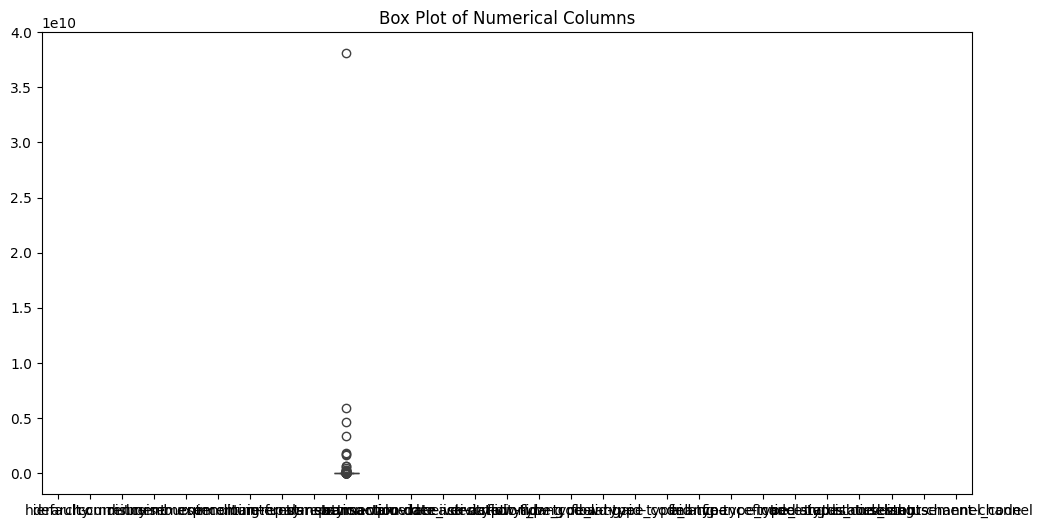

Rows with Outliers:
                          iati-identifier  hierarchy  \
621  US-EIN-13-3287064NAM-IRC-IQ-16-20092        NaN   
624  US-EIN-13-3287064NAM-IRC-TZ-16-20095        NaN   
779  US-EIN-13-3287064NAM-IRC-SL-16-20251        NaN   

                                                titles  default-currency  \
621  Protection and Assistance to IDPs and Returnee...               NaN   
624  Protection of Congolese and Burundian Refugees...               NaN   
779  Ensuring community based health care for mothe...               NaN   

     commitment  disbursement  reimbursement  expenditure  incoming-funds  \
621         NaN           NaN            NaN          NaN             NaN   
624         NaN           NaN            NaN          NaN             NaN   
779         NaN           NaN            NaN          NaN             NaN   

     loan-repayment  ...  aid-type_lang  aid-type finance-type_code  \
621             NaN  ...            NaN       NaN               NaN   

In [85]:
#Outlier Detection
#Visual Outlier Detection using Box Plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_curr)
plt.title('Box Plot of Numerical Columns')
plt.show()

#Statistical Outlier Detection using Z-Score
from scipy.stats import zscore

zscore_threshold = 3

z_scores = np.abs(zscore(df_curr.select_dtypes(include='number')))

outlier_rows = np.where(z_scores > zscore_threshold)[0]

print("Rows with Outliers:")
print(df_curr.iloc[outlier_rows])



In [91]:
df_again = pd.read_csv("rescue-data.csv")

print(df_again)

print(df_again.info())

                          iati-identifier  hierarchy  \
0      US-EIN-13-3287064NAM-IRC-HT-10-479        NaN   
1      US-EIN-13-3287064NAM-IRC-HT-10-480        NaN   
2      US-EIN-13-3287064NAM-IRC-HT-10-481        NaN   
3      US-EIN-13-3287064NAM-IRC-HT-10-482        NaN   
4      US-EIN-13-3287064NAM-IRC-HT-11-483        NaN   
..                                    ...        ...   
775  US-EIN-13-3287064NAM-IRC-JO-16-20247        NaN   
776  US-EIN-13-3287064NAM-IRC-UG-16-20248        NaN   
777  US-EIN-13-3287064NAM-IRC-KE-16-20249        NaN   
778  US-EIN-13-3287064NAM-IRC-IQ-16-20250        NaN   
779  US-EIN-13-3287064NAM-IRC-SL-16-20251        NaN   

                                                titles  default-currency  \
0    Integrated Emergency Protection Response to Ha...               NaN   
1                             Post Earthquake Response               NaN   
2    Post Earthquake Gender-Based Violence and Chil...               NaN   
3    Restoring a Protec

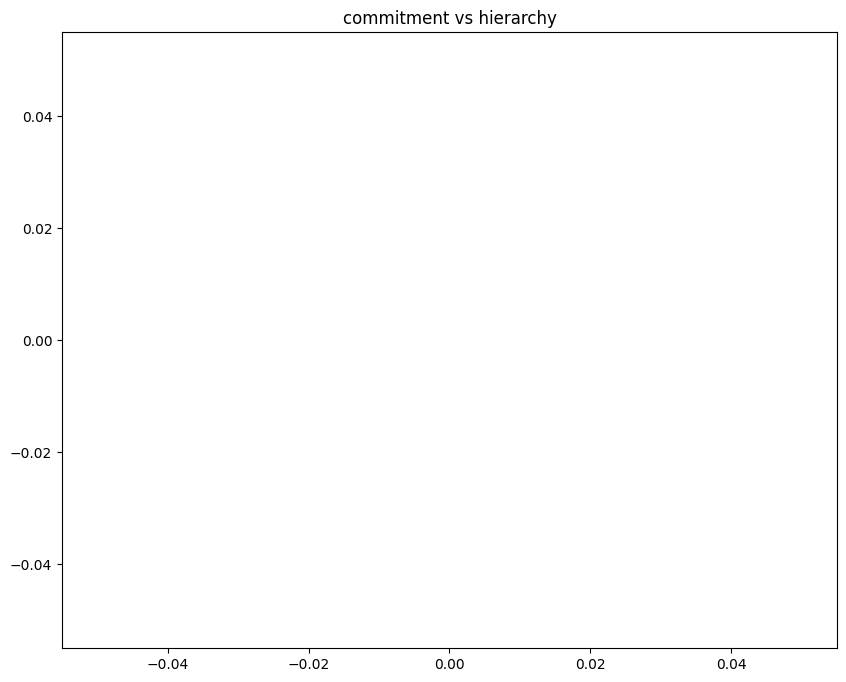

In [93]:


plt.figure(figsize=(10, 8))
sns.scatterplot(x='commitment', y='hierarchy', data=df_again)
plt.title('commitment vs hierarchy')
plt.show()

In [95]:
df_again['interest-repayment_squared'] = df_again['interest-repayment'].apply(lambda x: x * 2)

print(df_again['interest-repayment_squared'])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
775   NaN
776   NaN
777   NaN
778   NaN
779   NaN
Name: interest-repayment_squared, Length: 780, dtype: float64


In [96]:
df_again.to_csv('cleaned_dataset.csv', index=False)